<a href="https://colab.research.google.com/github/Fidi000/CSCI-191/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing

####Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter

Importing Titanic data

In [ ]:
#training data
!wget 'https://github.com/Fidi000/CSCI-191/raw/MLData/titanicTrain.csv'
#test data
!wget 'https://github.com/Fidi000/CSCI-191/raw/MLData/titanicTest.csv'

--2021-12-13 07:00:18--  https://github.com/Fidi000/CSCI-191/raw/MLData/titanicTrain.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fidi000/CSCI-191/MLData/titanicTrain.csv [following]
--2021-12-13 07:00:18--  https://raw.githubusercontent.com/Fidi000/CSCI-191/MLData/titanicTrain.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanicTrain.csv.2’

titanicTrain.csv.2  100%[===================>]  59.76K  --.-KB/s    in 0.002s  

2021-12-13 07:00:18 (34.2 MB/s) - ‘titanicTrain.csv.2’ saved [61194/61194]

--2021-12-13 07:00:18--  https://github.com/Fidi0

In [ ]:
train_df = pd.read_csv("titanicTrain.csv")
test_df = pd.read_csv('titanicTest.csv')

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Displaying Test Data

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


####Training Data Information

In [ ]:
print(train_df.isnull().sum())
train_df.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####Testing Data

In [ ]:
print(test_df.isnull().sum())
test_df.describe()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Creating sets to organize the information

In [ ]:
numerical_data = train_df[['Age', 'SibSp', 'Parch', 'Fare']] 
print("Numericals:\n" , numerical_data)
categorical_data = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']] 
print("\nCategoricals: \n" , categorical_data)

Numericals:
       Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]

Categoricals: 
      Survived  Pclass     Sex            Ticket Cabin Embarked
0           0       3    male         A/5 21171   NaN        S
1           1       1  female          PC 17599   C85        C
2           1       3  female  STON/O2. 3101282   NaN        S
3           1       1  female            113803  C123        S
4           0       3    male            373450   NaN        S
..        ...     ...     ...               ...   ...      ...
886         0       2    male            211536   NaN        S
887         1       1  female            11205

#### Numerical Histograms with Density Curves

Age Distribution w/ Density Curve (Red):
Age Min:  0.42
Age Max:  80.0


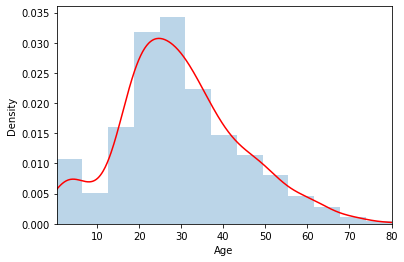

SibSp Distribution w/ Density Curve (Red):
SibSp Min:  0
SibSp Max:  8


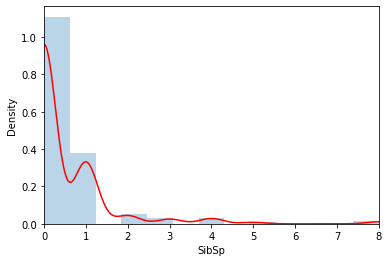

Parch Distribution w/ Density Curve (Red):
Parch Min:  0
Parch Max:  6


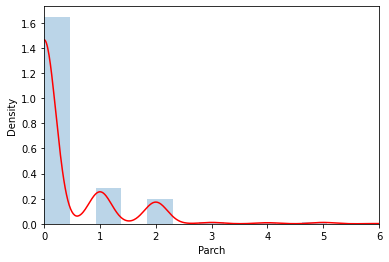

Fare Distribution w/ Density Curve (Red):
Fare Min:  0.0
Fare Max:  512.3292


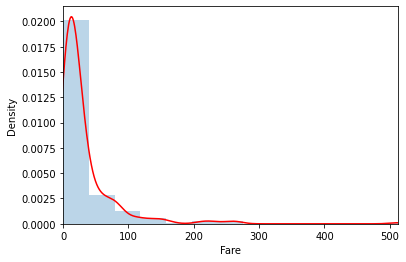

In [ ]:
for col in numerical_data.columns:
  print( col, "Distribution w/ Density Curve (Red):")
  print( col, "Min: ", train_df[col].min())
  print( col, "Max: ", train_df[col].max())
  ax = train_df[col].hist(bins=13, density=True, alpha=0.3) # Histogram
  train_df[col].plot(kind='density', color='red') #Density curve
  ax.set(xlabel= col) #X-Axis label
  plt.xlim(train_df[col].min(),train_df[col].max()) # Limits of values for the X - Axis
  plt.show()    

####Categorical Bar Graphs

Survived Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


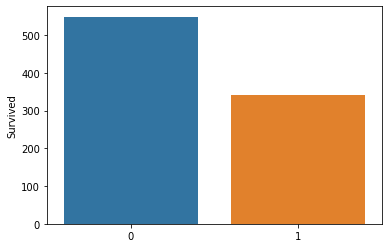

Pclass Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


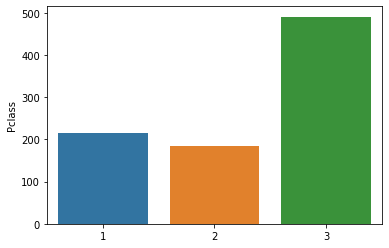

Sex Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


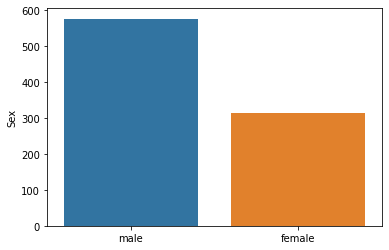

Ticket Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


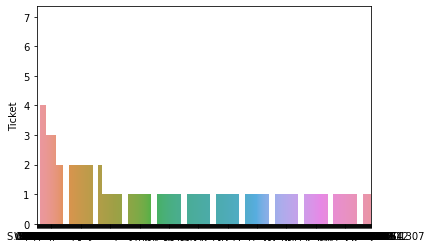

Cabin Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


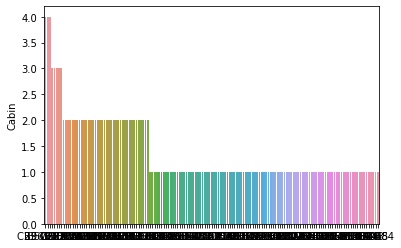

Embarked Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


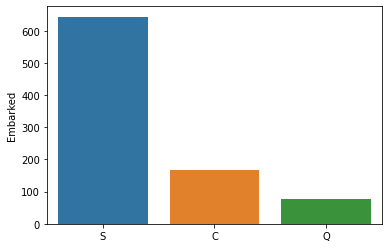

In [ ]:
for col in categorical_data.columns:
  print( col, "Bar Chart:")
  sns.barplot(categorical_data[col].value_counts().index , categorical_data[col].value_counts())
  plt.show()

---

####Probability of Survival by Sex

Probability of Survival based off Sex:
       Sex  Survived
0  female  0.742038
1    male  0.188908 



Text(0.5, 1.0, 'Probability of Survival by Sex')

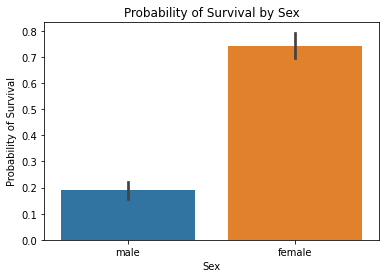

In [ ]:
print("Probability of Survival based off Sex:\n", train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean(), "\n")
sns.barplot(x = 'Sex' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival')
plt.title("Probability of Survival by Sex")

####Probability of Survival by Class

Probability of Survival based on Class:
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 




Text(0.5, 0, 'Passenger Class')

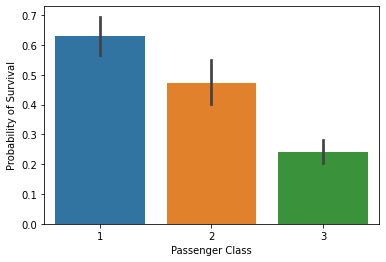

In [ ]:
print("Probability of Survival based on Class:\n", train_df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Pclass' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Class')

####Probability of Survival based off Embarked Location

Probability of Survival based off Embarked:
   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 




Text(0, 0.5, 'Probability of Survival (0-1)')

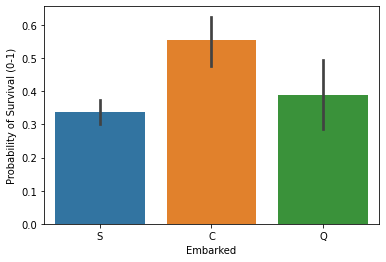

In [ ]:
print("Probability of Survival based off Embarked:\n", train_df[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Embarked' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')

---

####Did Class Affect The Survival Percentage By Sex?

Count Amount of Sex-By-Class:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347 




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


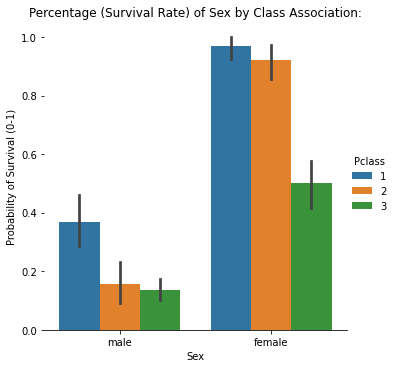

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


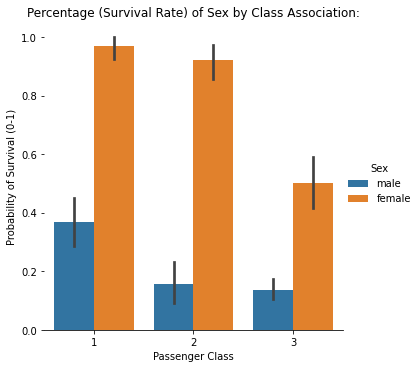

In [ ]:
print("Count Amount of Sex-By-Class:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Pclass", aggfunc= "count"), "\n\n")

ClassBySex = sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()


SexByClass = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Passenger Class')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()

####Did Embarked Locations Have Higher Survival Rated Based On Class?

Count Amount of Class-By-Embarked:
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353 




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


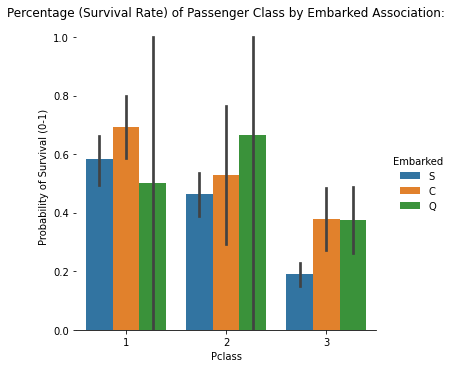

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


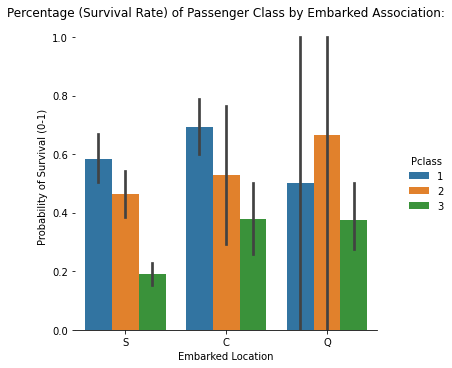

In [ ]:
print("Count Amount of Class-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Pclass", columns = "Embarked", aggfunc= "count"), "\n\n")


ClassBySex = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Embarked', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()


SexByClass = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Embarked Location')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()

####Histograms with Curves for Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


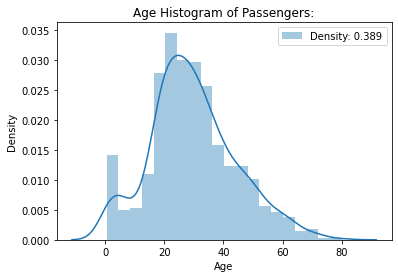

Age histograms by Deceased (0) and Survived (1):


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


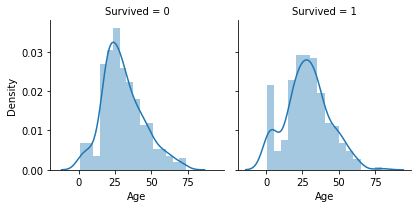

Age histograms by Passenger Class:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

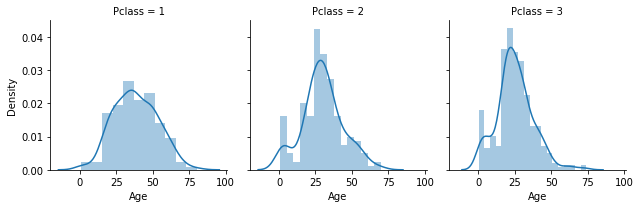

Age histograms by Embarked Location:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

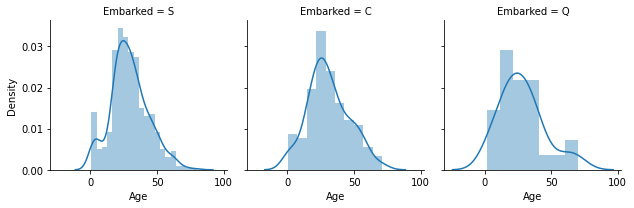




Line graph showing the density curves for ages of those who survived vs those who died


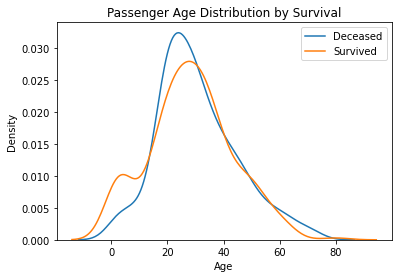

In [ ]:
sns.distplot(train_df['Age'], label = 'Density: %.3f'%(train_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Histogram of Passengers:')
plt.show()

print('Age histograms by Deceased (0) and Survived (1):')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Survived')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()


print('Age histograms by Passenger Class:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Pclass')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

print('Age histograms by Embarked Location:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Embarked')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

print("\n\n")
print('Line graph showing the density curves for ages of those who survived vs those who died')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 0], label = 'Deceased')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Passenger Age Distribution by Survival')
plt.legend()
plt.show()

####Probability of Survival by SibSp


Probability of survival by combined siblings + spouse:
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 




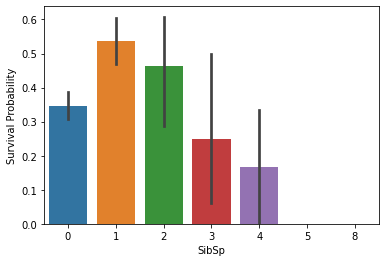

In [ ]:
print("Probability of survival by combined siblings + spouse:")
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean(),"\n\n")

sns.barplot(x = 'SibSp', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.show()

####Probability of Survival by Parch

survival probability by combined parents and children:
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 




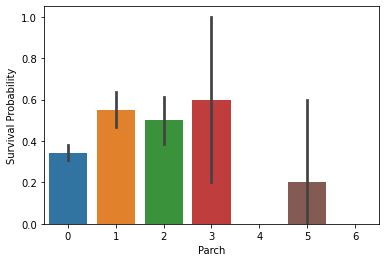

In [ ]:
print("survival probability by combined parents and children:")
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index = False).mean(),"\n\n")

sns.barplot(x = 'Parch', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.show()

####Original Missing Data

In [ ]:
print("Missing Values: ")
print(train_df.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


removing ticket and cabin category

In [ ]:
training_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
testing_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)

training_df.info()
testing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex      

####Removing Fare Nulls in the Testing Set

In [ ]:
median = testing_df['Fare'].dropna().median()
print("median for testing data fare: ", median, "\n")

testing_df['Fare'].fillna(median, inplace = True)

median for testing data fare:  14.4542 



remove nulls from embarked

In [ ]:
mode_embarked = training_df['Embarked'].dropna().mode()[0]
training_df['Embarked'].fillna(mode_embarked, inplace = True)

####Combined Training and Testing

In [ ]:
combine_df = pd.concat([training_df, testing_df], axis = 0).reset_index(drop = True)
combine_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


#####Combined Set Info

In [ ]:
print("Missing Values Combined: ")
print(combine_df.isnull().sum())

Missing Values Combined: 
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


Applying numerical values to sex Male:0 Female:1

In [ ]:
combine_df['Sex Value'] = combine_df['Sex'].map({'male': 0, 'female': 1})
combine_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


#####Filling in Null Age Cells

In [ ]:
Null_Age_Indices = list(combine_df[combine_df['Age'].isnull()].index)
print("The number of initial null Age cells is: ", len(Null_Age_Indices))
for index in Null_Age_Indices:
    median_age = combine_df['Age'].median()
    predict_age = combine_df['Age'][(combine_df['SibSp'] == combine_df.iloc[index]['SibSp']) 
                                 & (combine_df['Parch'] == combine_df.iloc[index]['Parch'])
                                 & (combine_df['Pclass'] == combine_df.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine_df['Age'].iloc[index] = median_age
    else:
        combine_df['Age'].iloc[index] = predict_age

The number of initial null Age cells is:  263


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

#####Checking null values in combined dataset



In [ ]:
print("Missing Values Combined: ")
print(combine_df.isnull().sum())

Missing Values Combined: 
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Sex Value        0
dtype: int64


####Adjusting Fare Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


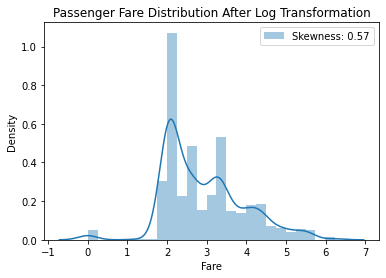

In [ ]:
combine_df['Fare'] = combine_df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
sns.distplot(combine_df['Fare'], label = 'Skewness: %.2f'%(combine_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')
plt.show()

Titles

In [ ]:
combine_df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine_df['Name']]
combine_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Capt              1
the Countess      1
Jonkheer          1
Don               1
Mme               1
Lady              1
Dona              1
Sir               1
Name: Title, dtype: int64

In [ ]:
combine_df['Title Simplified'] = combine_df['Title']

combine_df['Title Simplified'] = combine_df['Title Simplified'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess','Sir', 'Dona'], 'Rare')
combine_df['Title Simplified'] = combine_df['Title Simplified'].replace(['Mlle', 'Ms'], 'Miss')
combine_df['Title Simplified'] = combine_df['Title Simplified'].replace('Mme', 'Mrs')

combine_df['Title Simplified'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title Simplified, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


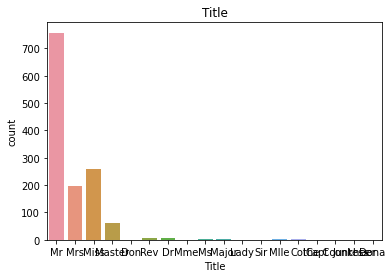

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


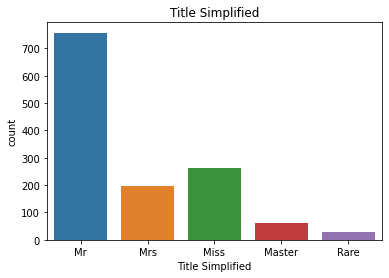

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


                                                 Name   Title
0                             Braund, Mr. Owen Harris      Mr
1   Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                              Heikkinen, Miss. Laina    Miss
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                            Allen, Mr. William Henry      Mr
5                                    Moran, Mr. James      Mr
6                             McCarthy, Mr. Timothy J      Mr
7                      Palsson, Master. Gosta Leonard  Master
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                 Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                    Sandstrom, Miss. Marguerite Rut    Miss
11                           Bonnell, Miss. Elizabeth    Miss
12                     Saundercock, Mr. William Henry      Mr
13                        Andersson, Mr. Anders Johan      Mr
14               Vestrom, Miss. Hulda Amanda Adolfina    Miss
15      

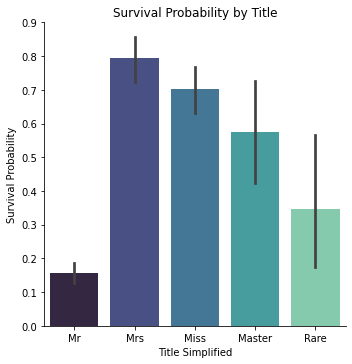

In [ ]:
sns.countplot(combine_df['Title'])
plt.title('Title')
plt.show()

sns.countplot(combine_df['Title Simplified'])
plt.title('Title Simplified')
plt.show()

print(combine_df[['Name', 'Title']].head(20), "\n\n")
print(combine_df[['Name', 'Title Simplified']].head(20), "\n\n")

sns.factorplot(x = 'Title Simplified', y = 'Survived', data = combine_df, kind = 'bar', palette = 'mako')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Title')
plt.show()

combine_df = combine_df.drop('Name', axis = 1)

####Survivability Based on Family Size

Survival Probability by Family Size:
   Family Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000 




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


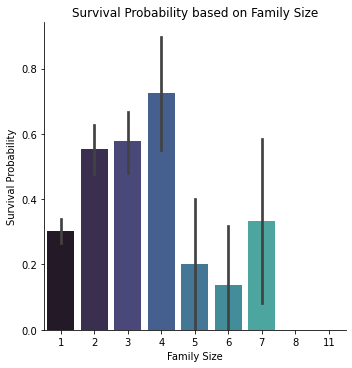

In [ ]:
combine_df['Family Size'] = combine_df['SibSp'] + combine_df['Parch'] + 1

print("Survival Probability by Family Size:")
print(combine_df[['Family Size', 'Survived']].groupby('Family Size', as_index = False).mean(), "\n\n")

sns.factorplot(x = 'Family Size', y = 'Survived', data = combine_df, kind = 'bar', palette = 'mako')
plt.ylabel('Survival Probability')
plt.title('Survival Probability based on Family Size')
plt.show()

####Percentage of Suvival Based on Sex by Status of Alone or Not Alone

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


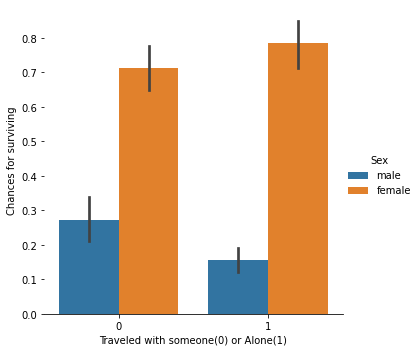

In [ ]:
combine_df['IsAlone'] = 0
combine_df.loc[combine_df['Family Size'] == 1, 'IsAlone'] = 1

print(combine_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean())

isAloneSurvival = sns.factorplot(x = 'IsAlone', y = 'Survived', hue = 'Sex', data = combine_df, kind = 'bar')
isAloneSurvival.despine(left = True)
plt.ylabel('Chances for surviving')
plt.xlabel('Traveled with someone(0) or Alone(1)')
plt.show()

####Combined Datafram Info at This point

In [ ]:
combine_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0


####Age Group Feature & Age Group Number Feature

In [ ]:
combine_df['Age Group'] = pd.cut(combine_df['Age'], 5)
print(combine_df[['Age Group', 'Survived']].groupby('Age Group', as_index=False).mean())
combine_df['Age Group Number']  = combine_df['Age']

combine_df.loc[combine_df['Age'] <= 16.136, 'Age Group Number'] = 0
combine_df.loc[(combine_df['Age'] > 16.136) & (combine_df['Age'] <= 32.102), 'Age Group Number'] = 1
combine_df.loc[(combine_df['Age'] > 32.102) & (combine_df['Age'] <= 48.068), 'Age Group Number'] = 2
combine_df.loc[(combine_df['Age'] > 48.068) & (combine_df['Age'] <= 64.034), 'Age Group Number'] = 3
combine_df.loc[combine_df['Age'] > 64.034 , 'Age Group Number'] = 4
combine_df.head(20)

          Age Group  Survived
0  (0.0902, 16.136]  0.500000
1  (16.136, 32.102]  0.341719
2  (32.102, 48.068]  0.412844
3  (48.068, 64.034]  0.434783
4    (64.034, 80.0]  0.090909


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone,Age Group,Age Group Number
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0,"(16.136, 32.102]",1.0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1,"(16.136, 32.102]",1.0
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1,"(48.068, 64.034]",3.0
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0,"(0.0902, 16.136]",0.0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0,"(16.136, 32.102]",1.0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0,"(0.0902, 16.136]",0.0


####Combing fare from both datasets


In [ ]:
combine_df['Fare Group'] = pd.cut(combine_df['Fare'], 4)
print(combine_df[['Fare Group', 'Survived']].groupby(['Fare Group'], as_index=False).mean())
combine_df['Fare Group Number']  = combine_df['Fare']
combine_df.loc[combine_df['Fare'] <= 1.56, 'Fare Group Number'] = 0
combine_df.loc[(combine_df['Fare'] > 1.56) & (combine_df['Fare'] <= 3.119), 'Fare Group Number'] = 1
combine_df.loc[(combine_df['Fare'] > 3.119) & (combine_df['Fare'] <= 4.679), 'Fare Group Number'] = 2
combine_df.loc[combine_df['Fare'] > 4.679, 'Fare Group Number'] = 3
combine_df.head(20)

         Fare Group  Survived
0  (-0.00624, 1.56]  0.062500
1     (1.56, 3.119]  0.288719
2    (3.119, 4.679]  0.504983
3    (4.679, 6.239]  0.745098


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone,Age Group,Age Group Number,Fare Group,Fare Group Number
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0,"(1.56, 3.119]",1.0
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1,"(48.068, 64.034]",3.0,"(3.119, 4.679]",2.0
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0,"(0.0902, 16.136]",0.0,"(1.56, 3.119]",1.0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0,"(0.0902, 16.136]",0.0,"(3.119, 4.679]",2.0


####Combined Dataframe 

In [ ]:
combine_feats = combine_with_features_df.copy()
combine_feats

,PassengerId,Survived,SibSp,Parch,Family Size,IsAlone,Age Group Number,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,0,2,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,2,1.0,1,0,2,0,2,2,1,0,0,0,0,0,1,0,1,0,1,0,0
2,3,1.0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,4,1.0,1,0,2,0,2,2,0,0,1,0,0,0,1,0,1,0,1,0,0
4,5,0.0,0,0,1,1,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1305,1306,NaN,0,0,1,1,2,3,1,0,0,0,0,0,0,1,1,0,1,0,0
1306,1307,NaN,0,0,1,1,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1307,1308,NaN,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1


####Add One Hot Encoding for Embarked, Title Simplified, Sex, and Pclass

In [ ]:
combine_feats.drop(columns=['Title', 'Sex Value', 'Age Group', 'Fare Group'], axis=1, inplace=True)
combine_feats = pd.get_dummies(combined_features, columns=["Embarked", "Title Simplified" , "Sex", "Pclass"])

combine_feats.head(10)

KeyError: ignored

####Drop Age and Fare

####Change Age Group Number and Fare Group Number From Float to Int

In [ ]:
combine_with_features_df.drop(columns=['Age', 'Fare'], axis=1, inplace=True)

combine_with_features_df['Age Group Number'] = combine_with_features_df['Age Group Number'].astype('int')
combine_with_features_df['Fare Group Number'] = combine_with_features_df['Fare Group Number'].astype('int')

combine_with_features_df.head(10)

KeyError: ignored

####Split Combined Set Back Into Training and Testing Sets

In [ ]:
training = combine_with_features_df[:len(train_df)]
testing = combine_with_features_df[len(train_df):]

print("Initial Final Set Length: ", len(train_df))
print("Initial Final Set Length: ", len(test_df))
print("")
print("Training Final Set Length: ", len(training_final_df), " | Training Final Set Shape: ", training_final_df.shape)
print("Testing Final Set Length: ", len(testing_final_df), " | Testing Final Set Shape: ", testing_final_df.shape)


Initial Final Set Length:  891
Initial Final Set Length:  418

Training Final Set Length:  881  | Training Final Set Shape:  (881, 20)
Testing Final Set Length:  418  | Testing Final Set Shape:  (418, 20)


####Drop PassengerID from Training and Change Survived from Float to Int

In [ ]:
training = training.drop('PassengerId', axis = 1)

training['Survived'] = training['Survived'].astype('int')

training.head(10)

,Survived,SibSp,Parch,Sex Value,Title,Family Size,IsAlone,Age Group,Age Group Number,Fare Group,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,Mr,2,0,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,1,1,0,1,Mrs,2,0,"(32.102, 48.068]",2,"(3.119, 4.679]",2,1,0,0,0,0,0,1,0,1,0,1,0,0
2,1,0,0,1,Miss,1,1,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,Mrs,2,0,"(32.102, 48.068]",2,"(3.119, 4.679]",2,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,Mr,1,1,"(32.102, 48.068]",2,"(1.56, 3.119]",1,0,0,1,0,0,1,0,0,0,1,0,0,1
5,0,0,0,0,Mr,1,1,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,1,0,0,0,1,0,0,0,1,0,0,1
6,0,0,0,0,Mr,1,1,"(48.068, 64.034]",3,"(3.119, 4.679]",2,0,0,1,0,0,1,0,0,0,1,1,0,0
7,0,3,1,0,Master,5,0,"(0.0902, 16.136]",0,"(1.56, 3.119]",1,0,0,1,1,0,0,0,0,0,1,0,0,1
8,1,0,2,1,Mrs,3,0,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,0,1,0,0,0,1,0,1,0,0,0,1
9,1,1,0,1,Mrs,2,0,"(0.0902, 16.136]",0,"(3.119, 4.679]",2,1,0,0,0,0,0,1,0,1,0,0,1,0


####Drop Survived from Testing Set (What we are Predicting)

In [ ]:
testing = testing.drop('Survived', axis = 1)
testing.head(10)

,PassengerId,SibSp,Parch,Sex Value,Title,Family Size,IsAlone,Age Group,Age Group Number,Fare Group,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
891,892,0,0,0,Mr,1,1,"(32.102, 48.068]",2,"(1.56, 3.119]",1,0,1,0,0,0,1,0,0,0,1,0,0,1
892,893,1,0,1,Mrs,2,0,"(32.102, 48.068]",2,"(1.56, 3.119]",1,0,0,1,0,0,0,1,0,1,0,0,0,1
893,894,0,0,0,Mr,1,1,"(48.068, 64.034]",3,"(1.56, 3.119]",1,0,1,0,0,0,1,0,0,0,1,0,1,0
894,895,0,0,0,Mr,1,1,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,0,1,0,0,1,0,0,0,1,0,0,1
895,896,1,1,1,Mrs,3,0,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,0,1,0,0,0,1,0,1,0,0,0,1
896,897,0,0,0,Mr,1,1,"(0.0902, 16.136]",0,"(1.56, 3.119]",1,0,0,1,0,0,1,0,0,0,1,0,0,1
897,898,0,0,1,Miss,1,1,"(16.136, 32.102]",1,"(1.56, 3.119]",1,0,1,0,0,1,0,0,0,1,0,0,0,1
898,899,1,1,0,Mr,3,0,"(16.136, 32.102]",1,"(3.119, 4.679]",2,0,0,1,0,0,1,0,0,0,1,0,1,0
899,900,0,0,1,Mrs,1,1,"(16.136, 32.102]",1,"(1.56, 3.119]",1,1,0,0,0,0,0,1,0,1,0,0,0,1
900,901,2,0,0,Mr,3,0,"(16.136, 32.102]",1,"(3.119, 4.679]",2,0,0,1,0,0,1,0,0,0,1,0,0,1


####Logistic Regression



In [ ]:
clf1 = LogisticRegression(solver='lbfgs', max_iter=10000)
clf1.fit(training.drop('Survived', axis = 1), training['Survived'] )

LogRegPredY = clf1.predict(testing.drop('PassengerId', axis = 1).copy())
print("Logistic Regression Y Predicted: ", LogRegPredY)
print("Logistic Regression Y Predicted Accuracy: ", round(clf1.score(training.drop('Survived', axis = 1), training['Survived']) * 100, 2))

ValueError: ignored

####MLP Classifier



In [ ]:
clf2 = Perceptron()
clf2.fit(training.drop('Survived', axis = 1), training['Survived'])

PerceptronPredY = clf2.predict(testing.drop('PassengerId', axis = 1).copy())
print("Perceptron Y Predicted: ", PerceptronPredY)
print("Perceptron Y Predicted Accuracy: ", round(clf2.score(training.drop('Survived', axis = 1), training['Survived']) * 100, 2))

Perceptron Y Predicted:  [0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1]
Perceptron Y Predicted Accuracy:  78.77
